In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

cities = pd.read_csv('CitiesExt.csv')
players = pd.read_csv('Players.csv')
teams = pd.read_csv('Teams.csv')



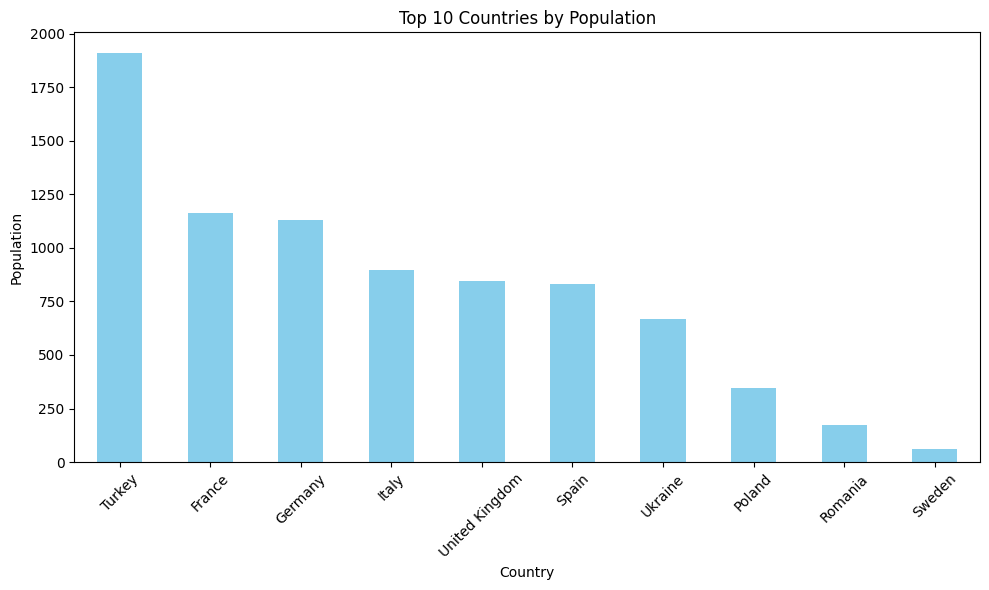

In [ ]:
# Part 1: Analysis with CitiesExt.csv
# Problem 1: Ten countries with the highest population
top_countries = cities.groupby('country')['population'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


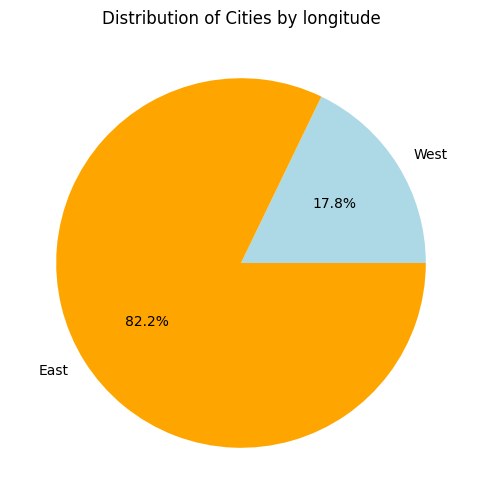

In [7]:

# Problem 2: Pie chart showing relative number of cities with negative/positive longitude
west = cities[cities['longitude'] < 0].shape[0]
east = cities[cities['longitude'] >= 0].shape[0]
plt.figure(figsize=(6, 6))
plt.pie([west, east], labels=['West', 'East'], autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Distribution of Cities by longitude')
plt.show()


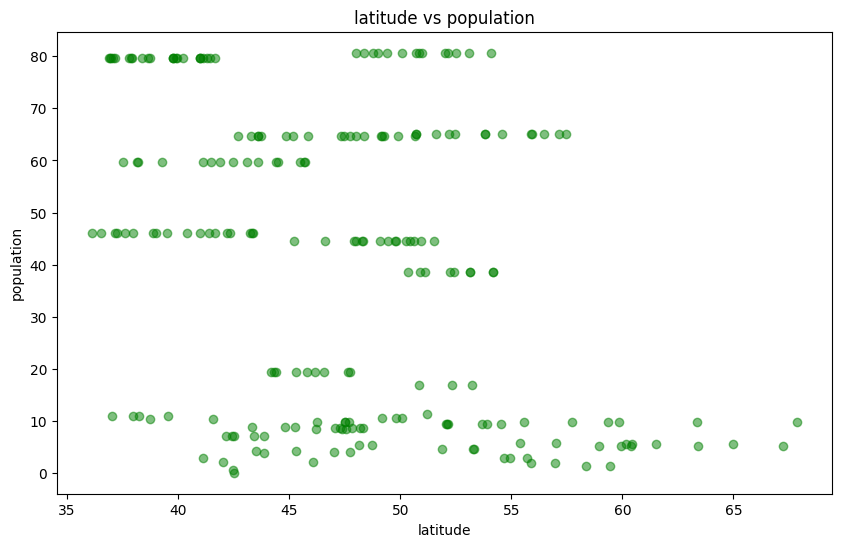

In [8]:

# Problem 3: Scatter plot of latitude vs population
plt.figure(figsize=(10, 6))
plt.scatter(cities['latitude'], cities['population'], alpha=0.5, color='green')
plt.title('latitude vs population')
plt.xlabel('latitude')
plt.ylabel('population')
plt.show()


The population does not exhibit a clear trend based on latitude.
Most cities are concentrated within specific latitude ranges (approximately 35 to 55).
Some clusters represent densely populated cities, but they do not show a strong dependency on latitude.

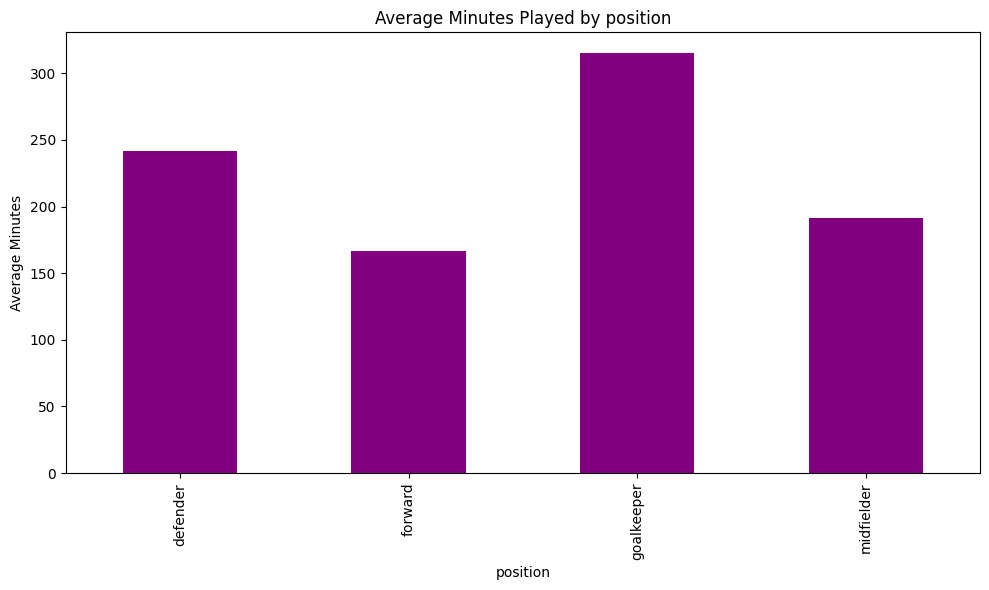

In [9]:
# Part 2: Analysis with Players.csv and Teams.csv
# Problem 4: Bar chart of average minutes played by position
average_minutes = players.groupby('position')['minutes'].mean()
plt.figure(figsize=(10, 6))
average_minutes.plot(kind='bar', color='purple')
plt.title('Average Minutes Played by position')
plt.xlabel('position')
plt.ylabel('Average Minutes')
plt.tight_layout()
plt.show()


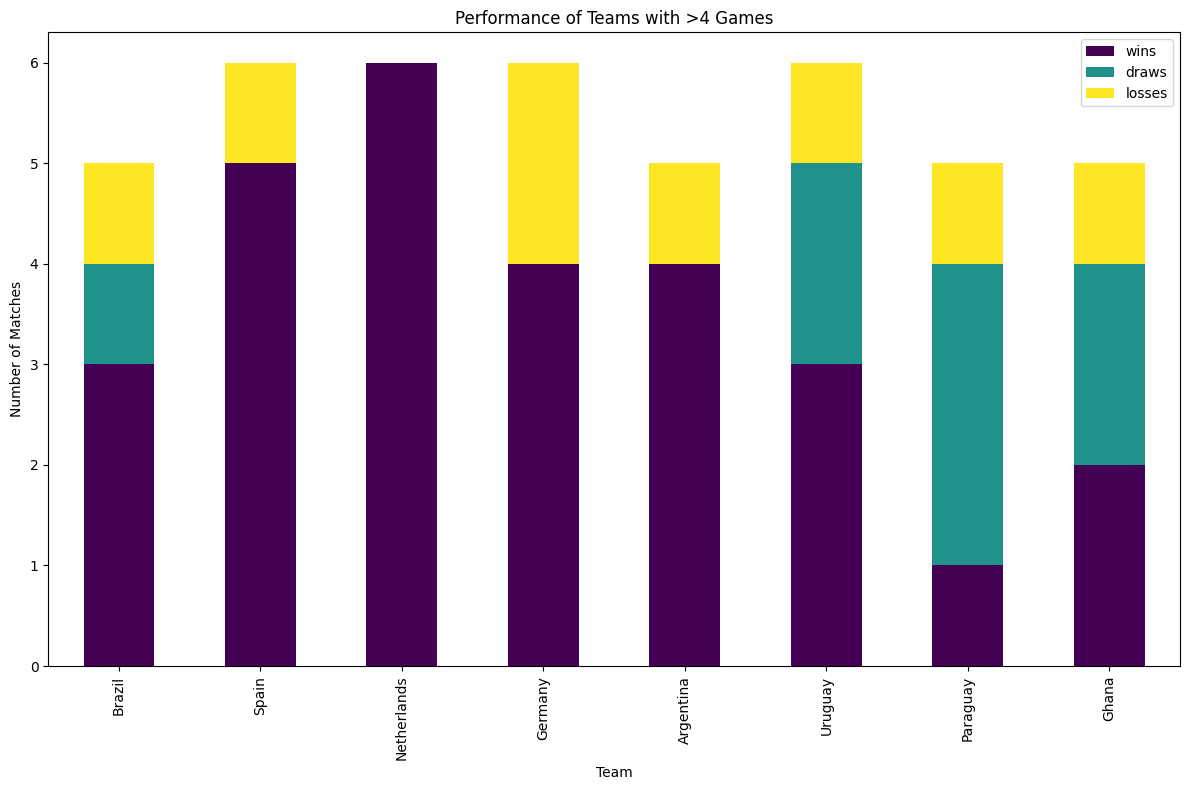

In [11]:

# Problem 5: Stacked bar chart of wins, draws, and losses for teams with >4 games
filtered_teams = teams[teams['games'] > 4]
filtered_teams.set_index('team')[['wins', 'draws', 'losses']].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Performance of Teams with >4 Games')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()


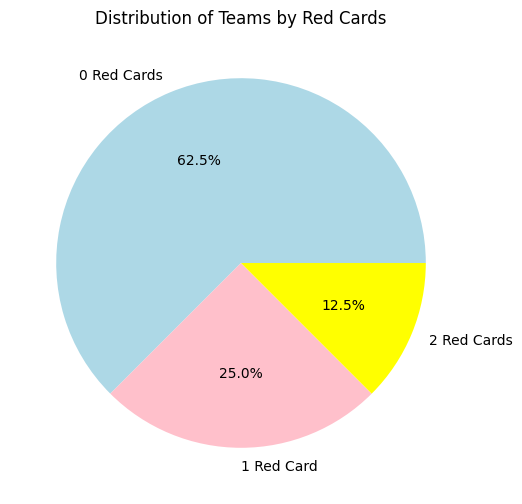

In [12]:

# Problem 6: Pie chart for teams with 0, 1, and 2 red cards
red_card_counts = teams['redCards'].value_counts().reindex([0, 1, 2], fill_value=0)
plt.figure(figsize=(6, 6))
plt.pie(red_card_counts, labels=['0 Red Cards', '1 Red Card', '2 Red Cards'], autopct='%1.1f%%', colors=['lightblue', 'pink', 'yellow'])
plt.title('Distribution of Teams by Red Cards')
plt.show()


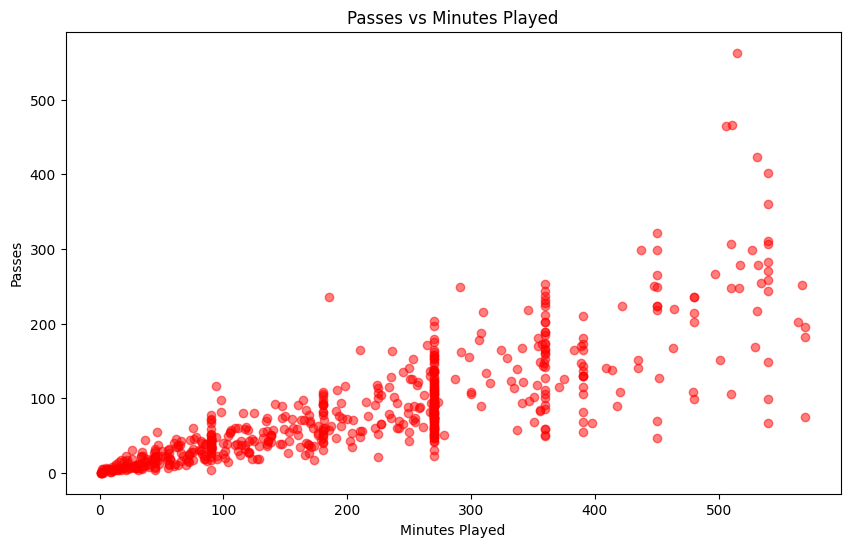

In [14]:

# Problem 7: Scatter plot of passes vs minutes
plt.figure(figsize=(10, 6))
plt.scatter(players['minutes'], players['passes'], alpha=0.5, color='red')
plt.title('Passes vs Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Passes')
plt.show()


The chart shows a positive trend: the number of passes increases with playing time.
Vertical clusters indicate players with the same playing time but varying numbers of passes, likely due to their roles in the team (e.g., midfielders pass more than defenders).

In [ ]:
import plotly.express as px

teams = teams[['team', 'goalsFor']]
teams["country"] = teams["team"]

# Tạo bản đồ với Plotly Express
fig = px.choropleth(
    teams,
    locations="country",
    locationmode="country names",
    color="goalsFor",
    title="Goals Scored by Teams in World Cup",
    color_continuous_scale="Blues",
    labels={"goalsFor": "Goals Scored"}
)

# Hiển thị bản đồ
fig.show()


Các quốc gia được tô màu đậm nhất (màu xanh đậm) là Uruguay và Brazil biểu thị số bàn thắng cao nhất.
Các quốc gia có màu nhạt hơn biểu thị số bàn thắng thấp hơn, và quốc gia không có màu có thể không tham gia, không có dữ liệu hoặc không ghi bàn.

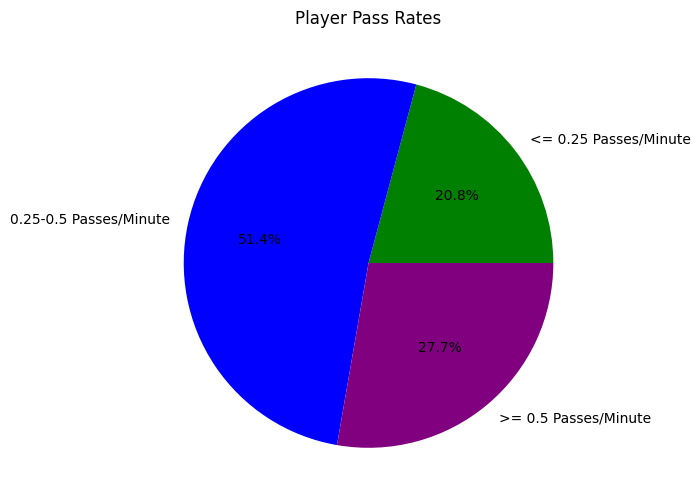

In [16]:

# Problem 9: Pie chart for passes per minute
passes_per_minute = players['passes'] / players['minutes']
categories = [
    (passes_per_minute <= 0.25).sum(),
    ((passes_per_minute > 0.25) & (passes_per_minute < 0.5)).sum(),
    (passes_per_minute >= 0.5).sum()
]
plt.figure(figsize=(6, 6))
plt.pie(categories, labels=['<= 0.25 Passes/Minute', '0.25-0.5 Passes/Minute', '>= 0.5 Passes/Minute'], autopct='%1.1f%%', colors=['green', 'blue', 'purple'])
plt.title('Player Pass Rates')
plt.show()
